In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import cifar10

data  = cifar10.load_data()

In [4]:
(x_train,  y_train), (x_test, y_test) = data

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
x_train[30].shape

(32, 32, 3)

In [8]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def get_name(n):
    n=int(n)
    return class_name[n]

In [9]:
print(get_name(y_train[30]))

airplane


In [10]:
x_train[30]

array([[[126, 118, 110],
        [122, 115, 108],
        [126, 119, 111],
        ...,
        [124, 118, 106],
        [120, 114, 102],
        [117, 111,  99]],

       [[122, 115, 107],
        [119, 112, 104],
        [121, 114, 106],
        ...,
        [124, 118, 106],
        [122, 116, 104],
        [117, 111,  99]],

       [[122, 115, 107],
        [121, 114, 106],
        [121, 114, 106],
        ...,
        [126, 120, 108],
        [123, 117, 105],
        [121, 115, 103]],

       ...,

       [[126, 118, 107],
        [126, 118, 107],
        [128, 120, 109],
        ...,
        [133, 125, 114],
        [122, 114, 103],
        [114, 106,  95]],

       [[125, 117, 106],
        [126, 118, 107],
        [127, 119, 108],
        ...,
        [128, 120, 109],
        [121, 113, 102],
        [114, 106,  95]],

       [[123, 115, 104],
        [123, 115, 104],
        [126, 118, 107],
        ...,
        [128, 119, 109],
        [126, 118, 107],
        [121, 113, 102]]

[2]
bird


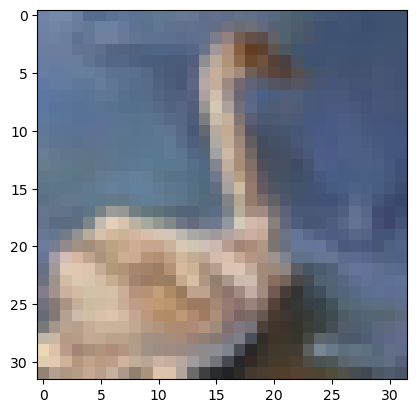

In [16]:
N=2550
import matplotlib.pyplot as plt 
plt.imshow(x_train[N])
print(y_train[N])
print(get_name(y_train[N]))

In [17]:
x_train.min()

0

In [18]:
x_test.max()

255

In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
x_train.min()

0.0

In [21]:
x_train.max()

1.0

In [33]:
from tensorflow.keras.models import Sequential

model=Sequential()

In [34]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dense

from tensorflow.keras.regularizers import l1_l2
l1_reg= 0.001
l2_reg = 0.0001

model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=3, padding='same', strides=(1,1), activation='relu' ))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', strides=(1,1), activation='relu'))
model.add(MaxPool2D(pool_size=3, padding='valid', strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', strides=(1,1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=(1,1), activation='relu'))
model.add(MaxPool2D(pool_size=3, padding='valid', strides=2))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units=128, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))




In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history   = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_data=(x_test, y_test), verbose=1,  callbacks=(callbacks))

Epoch 1/5
2500/2500 [==============================] - 205s 82ms/step - loss: 2.3512 - sparse_categorical_accuracy: 0.0977 - val_loss: 2.3505 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/5
2500/2500 [==============================] - 200s 80ms/step - loss: 2.3505 - sparse_categorical_accuracy: 0.0966 - val_loss: 2.3500 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/5
2500/2500 [==============================] - 206s 82ms/step - loss: 2.3499 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3495 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/5
2500/2500 [==============================] - 203s 81ms/step - loss: 2.3498 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3501 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/5
2500/2500 [==============================] - 201s 80ms/step - loss: 2.3502 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3500 - val_sparse_categorical_accuracy: 0.1000


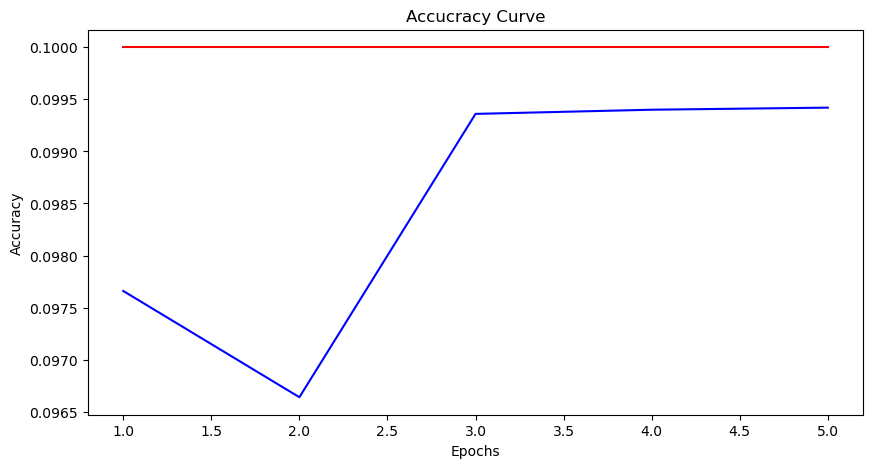

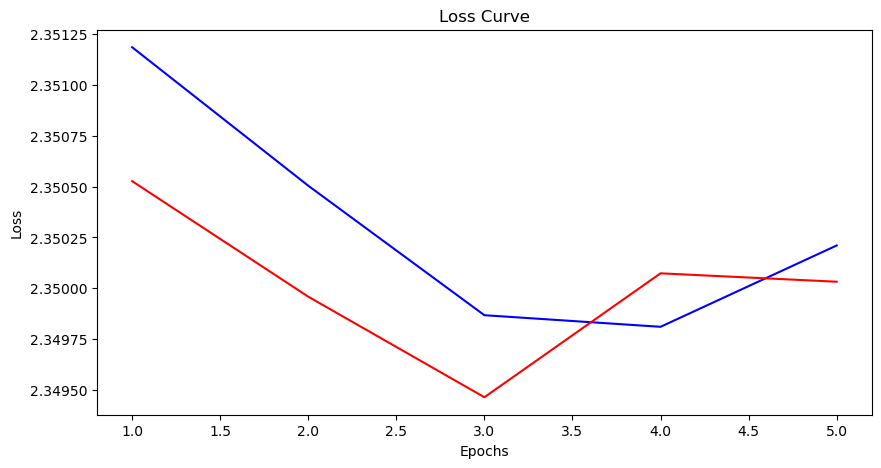

In [44]:
train_accuracy  = history.history['sparse_categorical_accuracy']
test_accuracy  = history.history['val_sparse_categorical_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch  = range(1, len(train_accuracy)+1)

plt.figure(figsize=(10, 5))
plt.plot(epoch, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epoch, test_accuracy, 'r', label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accucracy Curve")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epoch, train_loss, 'b', label='Train_Loss')
plt.plot(epoch, test_loss, 'r', label='Test_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss Curve')
plt.show()


In [45]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy: {}".format(accuracy))
print("Loss: {}".format(loss))

313/313 [==============================] - 12s 37ms/step - loss: 2.3500 - sparse_categorical_accuracy: 0.1000
Accuracy: 0.10000000149011612
Loss: 2.35003399848938


In [46]:
prediction = model.predict(x_test)

import numpy as np
prediction_values = np.argmax(prediction, axis=1)

313/313 [==============================] - 12s 37ms/step


<Axes: >

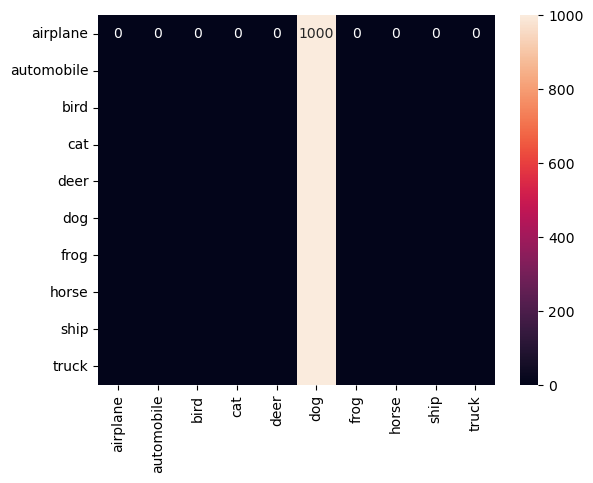

In [51]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, prediction_values)

import seaborn as sns
sns.heatmap(cn , annot=True, fmt='d', xticklabels=class_name, yticklabels=class_name)


In [53]:
import cv2

img = cv2.imread('06172023_transonic-illo_200022.jpg.webp')

In [54]:
img

array([[[161,  99,  59],
        [161,  99,  59],
        [161,  99,  59],
        ...,
        [163,  99,  59],
        [163,  99,  59],
        [163,  99,  59]],

       [[161,  99,  59],
        [161,  99,  59],
        [161,  99,  59],
        ...,
        [163,  99,  59],
        [163,  99,  59],
        [163,  99,  59]],

       [[161,  99,  59],
        [161,  99,  59],
        [161,  99,  59],
        ...,
        [163,  99,  59],
        [163,  99,  59],
        [163,  99,  59]],

       ...,

       [[182, 144, 127],
        [182, 144, 127],
        [182, 144, 127],
        ...,
        [189, 146, 125],
        [189, 146, 125],
        [189, 146, 125]],

       [[182, 145, 126],
        [182, 145, 126],
        [182, 145, 126],
        ...,
        [189, 146, 125],
        [189, 146, 125],
        [189, 146, 125]],

       [[182, 145, 126],
        [182, 145, 126],
        [182, 145, 126],
        ...,
        [189, 146, 125],
        [189, 146, 125],
        [189, 146, 125]]

In [55]:
img.shape

(1148, 2040, 3)

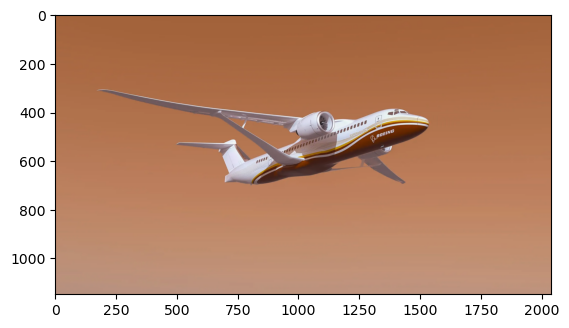

In [56]:
plt.imshow(img)

In [60]:
img = cv2.resize(img, (32, 32))

In [61]:
img.shape

(32, 32, 3)

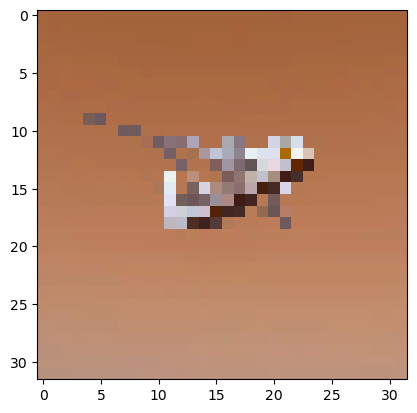

In [62]:
plt.imshow(img)

In [69]:
img = img.reshape(1,32, 32, 3)
real_pred = model.predict(img)
real_pred_val = np.argmax(real_pred, axis=1)
print(get_name(real_pred_val))

1/1 [==============================] - 0s 52ms/step
dog
